In [1]:
try:

    import tensorflow as tf
    import cv2
    import os
    import pickle
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")


Library Loaded Successfully ..........


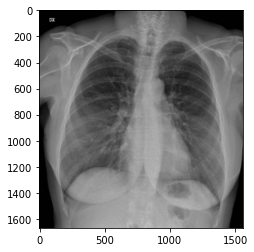

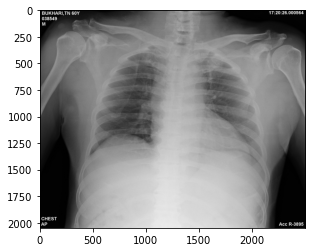

In [2]:
DATADIR = 'D:/ilmu/kuliah/TA/cnn/DATA PASIEN COVID RS UNAND'
CATAGORIES = ["non-covid","covid"]

for categorie in CATAGORIES:
    path = os.path.join(DATADIR, categorie)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break

In [3]:
print(len(img_array))

2048


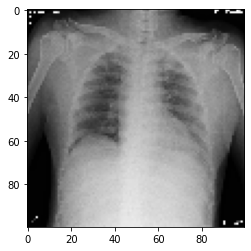

In [4]:
img_resize = 100
new_array = cv2.resize(img_array, (img_resize, img_resize))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
training_data = []
def create_training_data():
    for categorie in CATAGORIES:
        path = os.path.join(DATADIR, categorie)
        class_num = CATAGORIES.index(categorie)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_resize, img_resize))
                training_data.append([new_array, class_num])
            except:
                print("ada error nih bro")

create_training_data()


In [6]:
print(len(training_data))

200


In [7]:
import random
random.shuffle(training_data)

In [8]:
for contoh in training_data[:10]:
    print(contoh[1])

1
0
1
1
1
0
0
1
0
0


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, img_resize, img_resize, 1)




In [19]:
print(X.shape)

(600, 100, 100, 1)


In [10]:
import pickle

In [11]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [28]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X[59]

array([[[155],
        [153],
        [153],
        ...,
        [122],
        [122],
        [122]],

       [[ 93],
        [ 93],
        [ 93],
        ...,
        [161],
        [161],
        [152]],

       [[152],
        [152],
        [157],
        ...,
        [164],
        [163],
        [163]],

       ...,

       [[143],
        [143],
        [143],
        ...,
        [191],
        [191],
        [192]],

       [[192],
        [192],
        [196],
        ...,
        [194],
        [199],
        [199]],

       [[199],
        [201],
        [201],
        ...,
        [187],
        [187],
        [187]]], dtype=uint8)